# Minimun Latency Problem

In [1]:
import networkx as nx
import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from random import sample

## Ejemplo 1

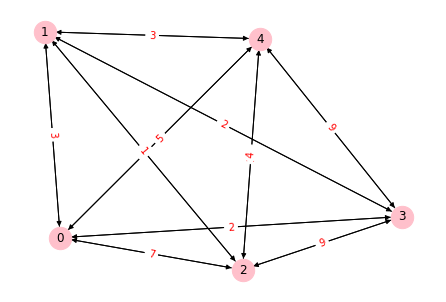

In [2]:
n = 5

G = nx.complete_graph(n)

G = G.to_directed()
nx.set_edge_attributes(G, {e: {'weight': randint(1, 10)} for e in G.edges})

weight = nx.get_edge_attributes(G, 'weight')
pos = nx.spring_layout(G)

nx.draw(G,pos, edge_color='black', width=1, linewidths=1,\
       node_size=500, node_color='pink', alpha=1,\
       labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight, font_color='red')
plt.axis('off')
plt.show()

Se tienen los pesos (costos) $w_{ij}$ de viajar del nodo $i$ al nodo $j$, en la siguiente lista:

In [3]:
weight

{(0, 1): 4,
 (0, 2): 8,
 (0, 3): 1,
 (0, 4): 7,
 (1, 0): 3,
 (1, 2): 7,
 (1, 3): 1,
 (1, 4): 5,
 (2, 0): 7,
 (2, 1): 1,
 (2, 3): 9,
 (2, 4): 10,
 (3, 0): 2,
 (3, 1): 2,
 (3, 2): 9,
 (3, 4): 3,
 (4, 0): 5,
 (4, 1): 3,
 (4, 2): 4,
 (4, 3): 9}

Cálculo de la **latencia** de cada nodo. Se denota por $l_{[i]}.$

In [4]:
def latency(u, route):
    global weight
    lat = 0
    for i in range(u):
        lat = lat + weight[route[i],route[i+1]]
    return(lat)

**Latencia total** de la ruta elegida. Se denota por $L$.

In [5]:
def total_latency(route):
    x = 0
    u = len(route)-1
    for i in range(u):
        x = x + (u-i)*weight[route[i],route[i+1]]
    return(x)

El problema de **latencia mínima** consiste en encontrar una permutación con el menor valor de latencia $L$ entre todas las permutaciones de los nodos $V$ teniendo al 0 como el nodo en la primer posición.

Vamos a desarrollar un constructivo utilizando el *mejor punto de inseción*. Para ello, se tiene la siguiente función que calcula el valor de insertar el nodo $i$ en la posición $q$, que denotamos por $\Delta L_{iq}$.

In [6]:
def delta(i, q, route):
    global weight

    k = len(route)-1
    
    if q==1:
        d = (k + 1)*weight[0,i] + k*(weight[i,route[1]] - weight[0,route[1]])
        
    elif q==k+1:
        d = 0
        for l in range(k):
            d = d + weight[route[l],route[l+1]]
        d = d + weight[route[k],i]
            
    else:
        d = 0
        for l in range(q-1):
            d = d + weight[route[l],route[l+1]]
        d = d + (k - q + 2)*weight[route[q-1],i] + (k - q + 1)*(weight[i,route[q]] - weight[route[q-1],route[q]])
            
    return(d)

En el siguiente código, se inicia la ruta solamente con el nodo 0, teniendo la ruta inicial como $[0]$. Se elige aleatoriamente el primer nodo a visitar, para después probar cual nodo sería el mejor a insertar en cuál posición.

Mientras no se tenga una ruta completa (con todos los nodos) el programa no termina.

In [7]:
route = [0]  #ruta inicial
w = randint(1, n-1) #se elige un nodo al azar
route.append(w) #se agrega a la ruta, para tener route = [0,w]

vertices = [x for x in range(n)] #conjunto de todos los vértices del grafo.
for i in route:
    vertices.remove(i)  #al conjunto de vértices, se le quitan aquellos que ya han sido asignados a la ruta.

while(len(vertices)>0): #mientras el conjunto de vértices tenga longitud mayor a cero (todavía hay nodos por asignar)
    for i in vertices:
        d = np.inf
        k = len(route)-1
        pos = 0
        for q in range(k+1):
            m = delta(i,q+1,route)
            if (m<d):
                d = m
                pos = q + 1
                j = i
    #print('d',d, 'pos',pos, 'j',j)
    route = route[:pos] + [j] + route[pos:] #se elige el mejor nodo j y se agrega en la mejor posición pos.
    vertices.remove(j) #se quita el vértice j elegido del conjunto de vértices.
    
print('Ruta: ',route, 'con latencia total de: ', total_latency(route)) #imprime la ruta final y su latencia total.

Ruta:  [0, 3, 4, 2, 1] con latencia total de:  22


Para poder generar más variedad de soluciones, vamos a generar una lista restringida de candidatos, de la cual se elegirán los $m$ mejores candidatos (en función de $\Delta L_{iq}$) y de esa lista se tomara un nodo al azar. La siguiente función genera una lista con los mejores $k$ candidatos.

In [8]:
def RCL(route,k):
    global weight, n
    candidates =[]
    vertices = [x for x in range(n)] #conjunto de todos los vértices del grafo.
    for i in route:
        vertices.remove(i)  #al conjunto de vértices, se le quitan aquellos que ya han sido asignados a la ruta.
        
    for i in vertices:
        r = len(route)-1
        for q in range(r+1):
            m = delta(i,q+1,route)
            candidates.append((m,i,q+1))
    
    w = sorted(candidates)
    w = w[:k]
    
    return(w)

De esta manera, tenemos el constructivo aleatorizado, para generar diversas soluciones.

In [9]:
route = [0]  #ruta inicial
w = randint(1, n-1) #se elige un nodo al azar
route.append(w) #se agrega a la ruta, para tener route = [0,w]

vertices = [x for x in range(n)] #conjunto de todos los vértices del grafo.
for i in route:
    vertices.remove(i)  #al conjunto de vértices, se le quitan aquellos que ya han sido asignados a la ruta.
    
while(len(vertices)>0):
    candidates = RCL(route,2)
    j = sample(candidates,1)
    vertice = j[0][1]
    position = j[0][2]

    route = route[:position] + [vertice] + route[position:]
    vertices. remove(vertice)
print('Ruta: ',route, 'con latencia total de: ', total_latency(route)) #imprime la ruta final y su latencia total.

Ruta:  [0, 3, 4, 1, 2] con latencia total de:  26


In [10]:
def constructive(): 
    route = [0]  #ruta inicial
    w = randint(1, n-1) #se elige un nodo al azar
    route.append(w) #se agrega a la ruta, para tener route = [0,w]

    vertices = [x for x in range(n)] #conjunto de todos los vértices del grafo.
    for i in route:
        vertices.remove(i)  #al conjunto de vértices, se le quitan aquellos que ya han sido asignados a la ruta.

    while(len(vertices)>0):
        candidates = RCL(route,2)
        j = sample(candidates,1)
        vertice = j[0][1]
        position = j[0][2]

        route = route[:position] + [vertice] + route[position:]
        vertices. remove(vertice)
    return(route)

Hacemos, ahora, un constructivo multi-arranque en base a nuestro constructivo aleatorizado:

In [11]:
def multi_arranque(rep):
    best_solution = np.inf


    for x in range(rep):
        x = constructive()
        if total_latency(x) < best_solution:
            x_best = x 
            best_solution = total_latency(x_best)

    print('Ruta: ',x_best, 'con latencia total de: ', total_latency(x_best))

In [12]:
multi_arranque(10000)

Ruta:  [0, 3, 4, 2, 1] con latencia total de:  22


## Ejemplo 2

In [13]:
n = 200

G = nx.complete_graph(n)

G = G.to_directed()
nx.set_edge_attributes(G, {e: {'weight': randint(1, 10)} for e in G.edges})

weight = nx.get_edge_attributes(G, 'weight')


In [14]:
weight

{(0, 1): 10,
 (0, 2): 3,
 (0, 3): 9,
 (0, 4): 3,
 (0, 5): 9,
 (0, 6): 9,
 (0, 7): 9,
 (0, 8): 7,
 (0, 9): 4,
 (0, 10): 7,
 (0, 11): 5,
 (0, 12): 3,
 (0, 13): 10,
 (0, 14): 4,
 (0, 15): 10,
 (0, 16): 2,
 (0, 17): 1,
 (0, 18): 8,
 (0, 19): 10,
 (0, 20): 5,
 (0, 21): 5,
 (0, 22): 5,
 (0, 23): 7,
 (0, 24): 3,
 (0, 25): 4,
 (0, 26): 6,
 (0, 27): 4,
 (0, 28): 8,
 (0, 29): 6,
 (0, 30): 5,
 (0, 31): 4,
 (0, 32): 2,
 (0, 33): 3,
 (0, 34): 2,
 (0, 35): 3,
 (0, 36): 3,
 (0, 37): 10,
 (0, 38): 7,
 (0, 39): 1,
 (0, 40): 3,
 (0, 41): 5,
 (0, 42): 10,
 (0, 43): 10,
 (0, 44): 1,
 (0, 45): 8,
 (0, 46): 4,
 (0, 47): 4,
 (0, 48): 3,
 (0, 49): 6,
 (0, 50): 3,
 (0, 51): 6,
 (0, 52): 4,
 (0, 53): 4,
 (0, 54): 4,
 (0, 55): 10,
 (0, 56): 10,
 (0, 57): 4,
 (0, 58): 1,
 (0, 59): 7,
 (0, 60): 3,
 (0, 61): 1,
 (0, 62): 2,
 (0, 63): 10,
 (0, 64): 1,
 (0, 65): 7,
 (0, 66): 3,
 (0, 67): 8,
 (0, 68): 8,
 (0, 69): 7,
 (0, 70): 3,
 (0, 71): 9,
 (0, 72): 4,
 (0, 73): 2,
 (0, 74): 6,
 (0, 75): 2,
 (0, 76): 3,
 (0, 77): 4

In [15]:
multi_arranque(100)

Ruta:  [0, 199, 198, 141, 39, 167, 17, 108, 190, 65, 195, 3, 174, 10, 122, 165, 136, 16, 151, 179, 6, 187, 109, 152, 48, 113, 155, 145, 127, 42, 182, 72, 12, 55, 123, 194, 159, 183, 156, 142, 85, 161, 164, 176, 189, 89, 79, 188, 134, 82, 5, 144, 117, 44, 132, 133, 15, 19, 130, 7, 62, 131, 169, 184, 158, 70, 121, 103, 111, 45, 115, 68, 69, 106, 54, 170, 33, 26, 11, 105, 168, 166, 186, 34, 154, 29, 87, 104, 21, 91, 22, 32, 1, 13, 171, 126, 18, 90, 162, 147, 177, 38, 185, 25, 178, 193, 23, 95, 46, 4, 192, 160, 163, 47, 114, 175, 57, 118, 84, 8, 191, 41, 37, 157, 35, 61, 58, 94, 153, 75, 98, 173, 197, 143, 140, 78, 119, 101, 9, 110, 52, 50, 36, 172, 14, 99, 30, 150, 71, 27, 66, 97, 125, 107, 49, 56, 196, 86, 81, 20, 40, 77, 2, 148, 112, 63, 181, 135, 53, 60, 73, 59, 137, 74, 67, 76, 96, 64, 88, 28, 93, 92, 120, 102, 124, 139, 31, 180, 80, 24, 83, 43, 100, 116, 129, 51, 149, 138, 128, 146] con latencia total de:  19913
